In [11]:
import os
import pandas as pd
species = 'buffalo'
# note species is huge, so we can load its zip file instead
fname = os.path.join('output', species + '_output.zip')
sdf = pd.read_csv(fname, compression='zip')

In [2]:
# limit to species label only
sdf = sdf[sdf.label=='species']
sdf.head()

,id,label,prediction_top,confidence_top,predictions_all,ID,Species
0,ASG00003hu,species,hippopotamus,0.5522,"{'aardvark': '0.0016', 'aardwolf': '0.0002', '...",2395,buffalo
8,ASG0000224,species,hyenaspotted,0.2048,"{'aardvark': '0.0191', 'aardwolf': '0.0097', '...",2396,buffalo
16,ASG0000225,species,buffalo,0.6250,"{'aardvark': '0.0021', 'aardwolf': '0.0000', '...",2397,buffalo
24,ASG00003i3,species,buffalo,0.9862,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",2398,buffalo
32,ASG00003ic,species,buffalo,0.4762,"{'aardvark': '0.0010', 'aardwolf': '0.0012', '...",2399,buffalo


In [3]:
# top ten predictions for the data
top_ten = sdf.prediction_top.value_counts()[:10]

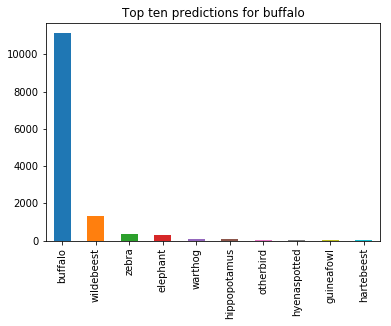

In [5]:
top_ten.plot.bar(title="Top ten predictions for " + species)

In [6]:
prediction_count = sdf.prediction_top.count()
species_count = sdf[sdf.prediction_top==species].prediction_top.count()
print("total predictions=", prediction_count)
print(species, "count=", species_count)
print("percent match=",float(species_count)/prediction_count)

total predictions= 13670
buffalo count= 11118
percent match= 0.8133138258961229


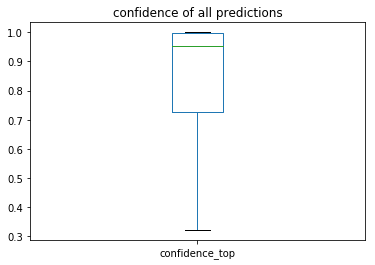

In [7]:
# confidence boxplot
sdf.confidence_top.plot.box(title='confidence of all predictions', showfliers=False)

In [8]:
sdf.confidence_top.describe()

count    13670.000000
mean         0.840366
std          0.209503
min          0.116900
25%          0.726625
50%          0.953950
75%          0.996400
max          1.000000
Name: confidence_top, dtype: float64

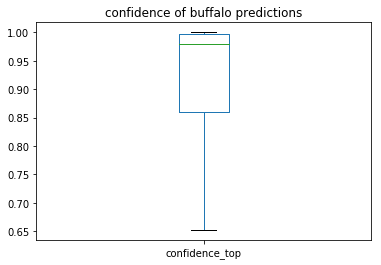

In [9]:
sdf[sdf.prediction_top==species].confidence_top.plot.box(title='confidence of {} predictions'.format(species), showfliers=False)

In [10]:
sdf[sdf.prediction_top==species].confidence_top.describe()

count    11118.000000
mean         0.895047
std          0.161575
min          0.116900
25%          0.859500
50%          0.979000
75%          0.997900
max          1.000000
Name: confidence_top, dtype: float64